Step 1: Import Python Libraries

In [28]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Step 2: Data Preparation


In [29]:
#Download and Read the Data
rating = pd.read_csv("ratings.csv")

movies = pd.read_csv("movies.csv")

links = pd.read_csv("links.csv")

tags = pd.read_csv("tags.csv")


In [30]:
# Observe the ratings dataset
rating.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [31]:
#Get the info of ratings datafame
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [32]:
rating.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [33]:
#Number of users
print("The rating data set has", rating["userId"].nunique(), "users")

#Number of movies
print("The rating data set has", rating["movieId"].nunique(), "movies")

#Number of ratings
print("The rating data set has", rating["rating"].nunique(), "ratings")

#Number of unique ratings
print("The unique ratings are", sorted(rating["rating"].unique()))

The rating data set has 610 users
The rating data set has 9724 movies
The rating data set has 10 ratings
The unique ratings are [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]


In [34]:
#Get the Data set info of movies datafame
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [35]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [36]:
# only choosing the columns movieid and title from movies dataset
movie_names = movies[["movieId", "title"]]
movie_names.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


Step 3: Exploratory Data Analysis EDA

In [37]:
#Merge ratings and movie dataset

popular_movie = pd.merge(rating, movies, on = "movieId", how = "inner")


# Grouping the movies by rating and getting the mean of the ratings and storing it in dataframe

In [38]:
#avg rating (3.9)
popular_movie =   pd.DataFrame(rating.groupby("movieId")["rating"].mean())

#sorting the values of rating in decending order as we need the most popular movie rated
#popular_movie.sort_values("rating", ascending= False, inplace= True)
popular_movie.head(10)


,rating
movieId,
1,3.920930
2,3.431818
3,3.259615
4,2.357143
5,3.071429
6,3.946078
7,3.185185
8,2.875000
9,3.125000


In [39]:
# Display the number of count for each unique mean rating
popular_movie["rating"].value_counts()

4.000000    1010
3.000000     917
3.500000     912
2.500000     521
2.000000     443
            ... 
1.928571       1
3.812000       1
2.922222       1
4.078014       1
4.280000       1
Name: rating, Length: 1286, dtype: int64

# Finding the movies which has received more number og ratings

In [40]:
popular_movie["rating_count"] = rating.groupby("movieId")["rating"].count()

Plot the raings and number of ratings

<AxesSubplot: >

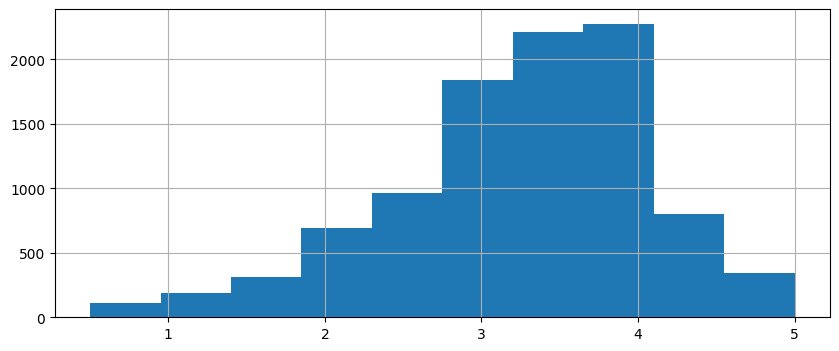

In [41]:
plt.figure(figsize = (10,4))
popular_movie["rating"].hist(bins =10)

Sorting the results with decending order format.

In [42]:
popular_movie.sort_values("rating_count", ascending= False, inplace= True)
popular_movie.head(10)

,rating,rating_count
movieId,,
356,4.164134,329
318,4.429022,317
296,4.197068,307
593,4.161290,279
2571,4.192446,278
260,4.231076,251
480,3.750000,238
110,4.031646,237
589,3.970982,224


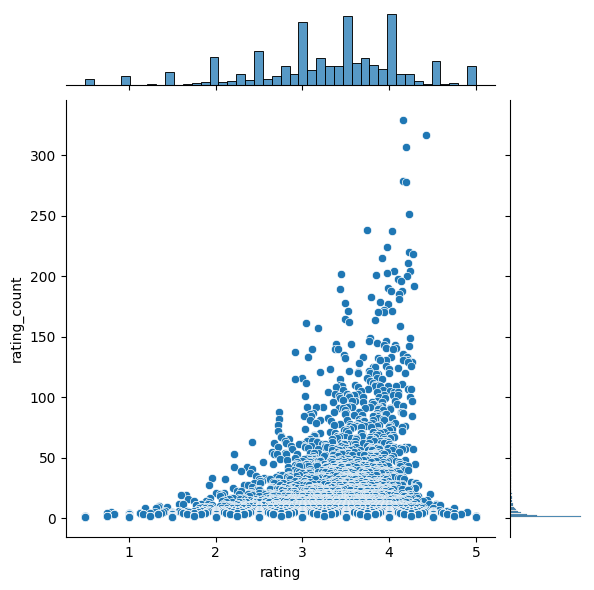

In [43]:
sns.jointplot(x ="rating", y = "rating_count", data= popular_movie)

In [44]:
#Extracting only the highest movie index and displaying the title of the movie
top_popular_movie = popular_movie.head(1).index[0] 
movie_names [movie_names["movieId"] == top_popular_movie]

,movieId,title
314,356,Forrest Gump (1994)


In [45]:
POPULAR_MOVIE_ID = top_popular_movie # movieid of Forest Gump stored as constant
POPULAR_MOVIE_ID

356

finding the movies with similar correlation by Creating sparse matrix  

In [46]:
user_Id_df = pd.pivot_table(data= rating, index = "userId",columns = "movieId", values = "rating" )
user_Id_df.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


filtering the movies similar to the Popular movie id

In [47]:
# locating from the rows for movies from the matrix similar to the movie Forest Gump
similar_movie_ratings = user_Id_df.loc[: ,POPULAR_MOVIE_ID]

# Exclude NAN values 
similar_movie_ratings[similar_movie_ratings >= 0]

userId
1      4.0
6      5.0
7      5.0
8      3.0
10     3.5
      ... 
605    3.0
606    4.0
608    3.0
609    4.0
610    3.0
Name: 356, Length: 329, dtype: float64

Storing the movies with similar correlation with the popular movie (Forest Gump)

In [48]:
similar_movies_corr = user_Id_df.corrwith(similar_movie_ratings)
similar_movies_corr

c:\Python\Python310\lib\site-packages\numpy\lib\function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Python\Python310\lib\site-packages\numpy\lib\function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


movieId
1         0.303465
2         0.367247
3         0.534682
4         0.388514
5         0.349541
            ...   
193581         NaN
193583         NaN
193585         NaN
193587         NaN
193609         NaN
Length: 9724, dtype: float64

In [49]:
# Removing  the NAN Rows

corr_similarmovie = pd.DataFrame(similar_movies_corr, columns= ["Correlation_Score"])
corr_similarmovie.dropna(inplace= True)


corr_similarmovie.head()

,Correlation_Score
movieId,
1,0.303465
2,0.367247
3,0.534682
4,0.388514
5,0.349541


Step 4: Recommender system 

In [50]:
# merging the similar movie rating to the correlated movies results

similarmovie_summary  = corr_similarmovie.join(popular_movie["rating_count"])


# Drop the most popular movie so that it is not recommended to the users
similarmovie_summary.drop(POPULAR_MOVIE_ID, inplace= True)

similarmovie_summary.head(10)

,Correlation_Score,rating_count
movieId,,
1,0.303465,215
2,0.367247,110
3,0.534682,52
4,0.388514,7
5,0.349541,49
6,0.137421,102
7,0.106567,54
8,0.656020,8
9,0.000000,16


In [51]:
# Get the most reviewd rows
similarmovie_summary= similarmovie_summary[similarmovie_summary["rating_count"] >= 3]

# Sort the rows by the correlation score descning
similarmovie_summary = similarmovie_summary.sort_values("Correlation_Score", ascending=False)

# Get the Top 10x Similar places to Tortas
similarmovie_summary.head(10)

,Correlation_Score,rating_count
movieId,,
71823,1.0,4
3480,1.0,3
26870,1.0,3
110882,1.0,3
3937,1.0,4
5625,1.0,3
130450,1.0,3
7104,1.0,3
71668,1.0,3


In [52]:
# Store the Top 10x Movies
recommend_movies_10 = similarmovie_summary.head(10)

In [53]:
recommend_movies_10 = recommend_movies_10.merge(movie_names, left_index = True, right_on= "movieId")

recommend_movies_10

,Correlation_Score,rating_count,movieId,title
7163,1.0,4,71823,"New York, I Love You (2009)"
2604,1.0,3,3480,Lucas (1986)
5590,1.0,3,26870,Major League II (1994)
8420,1.0,3,110882,Locke (2013)
2934,1.0,4,3937,Runaway (1984)
3988,1.0,3,5625,Moonlight Mile (2002)
8800,1.0,3,130450,Pan (2015)
4773,1.0,3,7104,1941 (1979)
7159,1.0,3,71668,Couples Retreat (2009)
232,1.0,5,270,Love Affair (1994)
